<div class="alert alert-block alert-success">
<b>Implementation of the naive exact matching algorithm</b>
</div>

In [2]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

<div class="alert alert-block alert-success">
<b> Function that takes a DNA string and returns its reverse complement </b>
</div>

In [3]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

<div class="alert alert-block alert-success">
<b> Function that parses a DNA reference genome from a file in the FASTA format </b>
</div>

In [18]:
    def readGenome(filename):
        genome = ''
        with open(filename, 'r') as f:
            for line in f:
                # ignore header line with genome information
                if not line[0] == '>':
                    genome += line.rstrip()
        return genome

<div class="alert alert-block alert-success">
<b>Function that parses the read and quality strings from a FASTQ file containing sequencing reads</b>
</div>

In [25]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

def phred33ToQ(qual):
    return ord(qual) - 33


def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*len(qualities[0])
    for qual in qualities:
        for i in range(len(qual)):
            q = phred33ToQ(qual[i])
            hist[i] += q
    return hist

<div class="alert alert-block alert-success">
<b> HW </b>
</div>

In [19]:
def rcNaive(read):
    genome = readGenome("lambda_virus.fa")

    revread = reverseComplement(read)

    countRead = naive(read, genome)
    countRe_read = []
    if read != revread:
        countRe_read = naive(revread, genome)
        print(len(countRead) + len(countRe_read))
    else:
        print(len(countRead))

In [ ]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        mismatches = 0
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                if mismatches < 2:
                    mismatches += 1
                else:
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

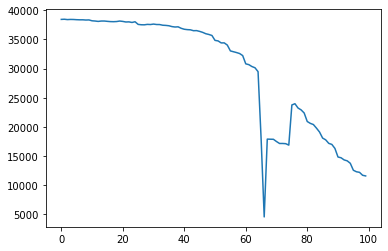

In [26]:
%matplotlib inline
reads_file = 'ERR037900_1.first1000.fastq'
_, quals = readFastq(reads_file)
qual_hist = createHist(quals)
plt.plot(range(len(qual_hist)), qual_hist)
plt.show()